**Калиновский Владимир Владимирович БПАД 224**

<div class="alert alert-warning">
    <h2> 💡Analysis of Data from All-Russian Population Surveys Obtained as a Part of the Monitoring the Status of the Civil Society at the NRU HSE<a class="tocSkip"> </h2>
    
</div>

## Data upload

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vladimirkalinovskii/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder
)


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from scipy.stats import kendalltau


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [4]:
pip install notebook-as-pdf -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
# data upload
data = pd.read_excel('/Users/vladimirkalinovskii/Desktop/trash/курсовая 1/883_ИМД-2.xlsx', index_col=0)

In [6]:
data.head()

,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1,Q2,...,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
ID,,,,,,,,,,,,,,,,,,,,,
Идентификатор респондента,Region. Отметьте Ваш регион,FO. Федеральный округ,Место опроса,"S1. Тип населённого пункта, где живёт респондент",S2. Пол респондента,"S3. Скажите, пожалуйста, сколько лет Вам испол...",(Запишите) (лет),S4. Какое у Вас образование?,"Q1. Как Вы считаете, большинству людей можно д...","Q2. А если говорить о людях, которые окружают ...",...,"D6. В какой отрасли Вы работаете, какова сфера...",Другое (уточните),D7. Членом или сторонником какой политической ...,Другое (уточнить),D8. Считаете ли Вы себя верующим человеком? И ...,Другое (уточнить ),D9. Какое место занимает религия в Вашей жизни?,D10. В чём выражается Ваша принадлежность к ве...,Другое (уточнить ),D11. Как Вы оцениваете состояние своего здоровья?
063a20a33e679b4,Приморский край,Дальневосточный федеральный округ,Надеждинский муниципальный район,Село,Мужчина,60+ лет,70,"Среднее специальное (колледж, техникум, медици...",Большинству людей можно доверять,Большинству можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Среднее
06539b004760a54,Саратовская область,Приволжский федеральный округ,Энгельсский муниципальный район,Село,Мужчина,60+ лет,71,Среднее общее (школа),Большинству людей можно доверять,Большинству можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Плохое
06e85272a3a11d4,Республика Дагестан,Северо-Кавказский федеральный округ,г. Буйнакск,Город с населением от 50 до 100 тыс.,Женщина,35-44 года,44,"Высшее (диплом специалиста, бакалавра, магистра)",В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,...,"Сфера услуг, сервиса, бытового обслуживания",NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Мусульманин,NaN,Очень важное,"Стараюсь выполнять религиозные предписания, ре...",NaN,Среднее
06470c0967c0d24,Пермский край,Приволжский федеральный округ,г. Березники,Город с населением от 100 до 500 тыс.,Мужчина,35-44 года,43,"Среднее специальное (колледж, техникум, медици...",В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,...,Промышленное производство (в т.ч. добывающие о...,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Православный,NaN,Затрудняюсь ответить,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее


In [7]:
# Check the number of rows and columns
data.shape

(2003, 500)

<div class="alert alert-warning">
    <h2> 1️⃣ Let's examine the first 8 columns. <a class="tocSkip"> </h2>
    
</div>

## Data preprocessing 

**Since the dataset is extremely large in terms of columns (500 in total), let's start by taking the first 8 to examine the data and understand how to proceed with it.**

In [8]:
df_education = data.iloc[1:, :9]

In [9]:
# Convert Respondent Identifier from index to column
df_education.reset_index(inplace= True , level = ['ID'])

In [10]:
df_education.head(3)

,ID,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1
0,063a20a33e679b4,Приморский край,Дальневосточный федеральный округ,Надеждинский муниципальный район,Село,Мужчина,60+ лет,70,"Среднее специальное (колледж, техникум, медици...",Большинству людей можно доверять
1,06539b004760a54,Саратовская область,Приволжский федеральный округ,Энгельсский муниципальный район,Село,Мужчина,60+ лет,71,Среднее общее (школа),Большинству людей можно доверять
2,06e85272a3a11d4,Республика Дагестан,Северо-Кавказский федеральный округ,г. Буйнакск,Город с населением от 50 до 100 тыс.,Женщина,35-44 года,44,"Высшее (диплом специалиста, бакалавра, магистра)",В отношениях с людьми следует быть осторожными


In [11]:
# Let's check the data for missing values
df_education.isna().sum()

ID        0
REGION    0
FO        0
Q1010     0
S1        0
S2        0
S3        0
S3_AGE    0
S4        0
Q1        0
dtype: int64

In [12]:
# Let's check for duplicates in the data
df_education.duplicated().sum()

0

## Exploratory data analysis

In [13]:
# Let's see which region had the most participants
df_education['REGION'].value_counts()

REGION
Город Москва                         170
Город Санкт-Петербург                 73
Республика Дагестан                   69
Ставропольский край                   65
Ростовская область                    49
Приморский край                       45
Республика Крым                       44
Омская область                        44
Республика Коми                       44
Удмуртская Республика                 43
Кировская область                     43
Краснодарский край                    43
Ульяновская область                   42
Саратовская область                   42
Алтайский край                        42
Астраханская область                  42
Иркутская область                     42
Республика Татарстан                  41
Новосибирская область                 40
Ленинградская область                 40
Самарская область                     40
Республика Башкортостан               40
Красноярский край                     39
Чувашская Республика                  39
Тверская 

In [14]:
# identify the top 5 cities
lst = ['Город Москва', 'Город Санкт-Петербург', 'Республика Дагестан', 'Ставропольский край', 'Ростовская область']

In [15]:
# check the median age in the top 5 cities by the number of respondents, divided by gender (female and male).
pivot_age = df_education.query('REGION in @lst').pivot_table(index="REGION", values="S3_AGE", columns=['S2'], aggfunc = 'median')
pivot_age

S2,Женщина,Мужчина
REGION,,
Город Москва,46.0,42.5
Город Санкт-Петербург,45.5,41.0
Республика Дагестан,46.0,38.5
Ростовская область,48.0,42.0
Ставропольский край,50.0,47.0


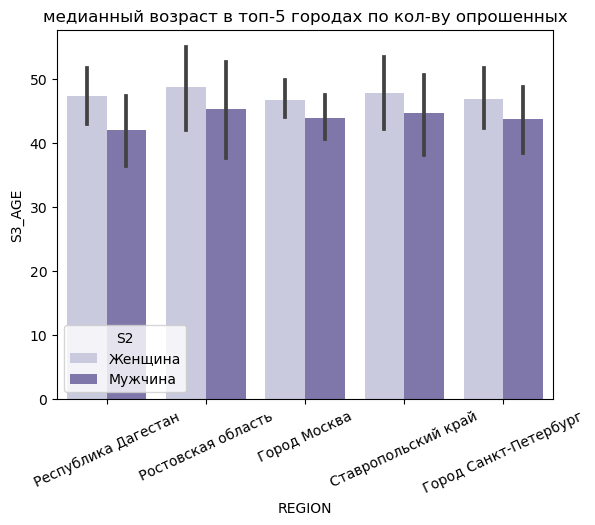

In [16]:
ax = sns.barplot(x='REGION', y='S3_AGE', data=df_education.query('REGION in @lst'), \
            hue='S2', palette='Purples')
ax.set_title('медианный возраст в топ-5 городах по кол-ву опрошенных', fontsize = 12)
plt.xticks(rotation = 25)
plt.show()

In [17]:
# Let's look at the distribution of education levels among the respondents
df_education['S4'].value_counts()

S4
Среднее специальное (колледж, техникум, медицинское училище и т.п.)    768
Высшее (диплом специалиста, бакалавра, магистра)                       553
Среднее общее (школа)                                                  350
Неполное среднее или ниже                                              207
Незаконченное высшее (обучение в вузе без получения диплома)            70
Начальное профессиональное (ПТУ, профессиональный лицей и т.п.)         52
Аспирантура, учёная степень, звание                                      2
Name: count, dtype: int64

In [18]:
data['S4'] = data['S4'].replace('Среднее специальное (колледж, техникум, медицинское училище и т.п.) ', 'Среднее специальное ')

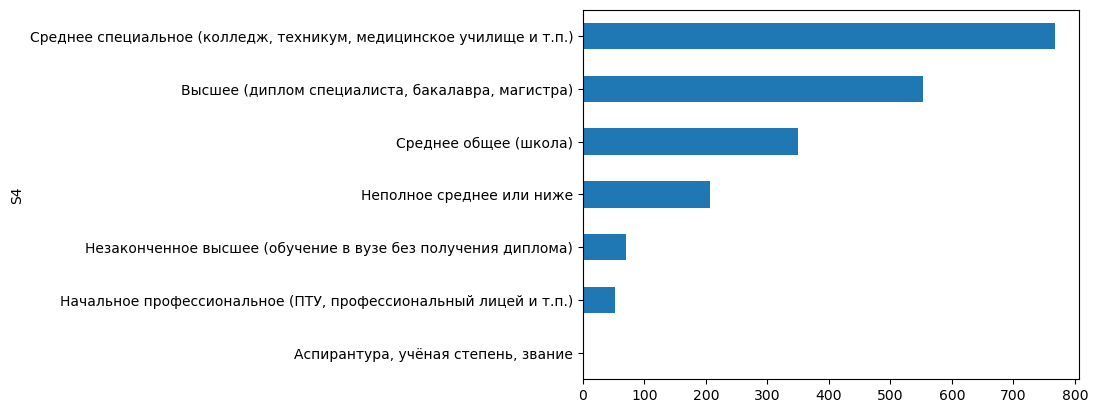

In [19]:
ax = df_education['S4'].value_counts().sort_values().plot(kind='barh')

<div style="border:solid Chocolate 2px; padding: 40px">

## 1️⃣ Conclusion of exploratory analysis: <a class="tocSkip">

- Top 5 cities by number of respondents: Moscow, St. Petersburg, Republic of Dagestan, Stavropol Krai, Rostov Oblast.
- The oldest respondents are from Stavropol Krai, with a median age of 50 for women and 47 for men.
- There were more female participants than male participants in the survey, and they tended to be older.
- 38.4% have completed vocational education, and only 2 respondents have completed postgraduate education.


<div class="alert alert-warning">
    <h2>  2️⃣ Consider a slice of columns [Q1:Q6].<a class="tocSkip"> </h2>
    
</div>

## Data preprocessing

In [20]:
df_cluster_1 = data.iloc[1:, 8:14]
df_cluster_1.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6
ID,,,,,,
063a20a33e679b4,Большинству людей можно доверять,Большинству можно доверять,"Безусловно, согласия, сплоченности","Безусловно, согласия, сплоченности",Скорее к первым (к готовым объединяться),"Да, приходилось"
06539b004760a54,Большинству людей можно доверять,Большинству можно доверять,/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить,"Скорее согласия, сплоченности","Безусловно, к первым (к готовым объединяться)","Нет, не приходилось"
06e85272a3a11d4,В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,"Скорее несогласия, разобщенности","Безусловно, несогласия, разобщенности","Безусловно, к первым (к готовым объединяться)","Да, приходилось"


In [21]:
# Let's replace values '/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить' on -->
# 'Затрудняюсь ответить'
df_cluster_1 = df_cluster_1.replace(['/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить'],\
                                    'Затрудняюсь ответить')

In [22]:
# Let's create a function to check for implicit duplicates.
def uniq(data):
    x = data.select_dtypes(include='object').columns.tolist()
    for i in x:
        print(i)
        print(data[i].unique())
        print(data[i].nunique())
        print()


In [23]:
# investigate the data for implicit duplicates
uniq(df_cluster_1)

Q1
['Большинству людей можно доверять'
 'В отношениях с людьми следует быть осторожными' 'Затрудняюсь ответить']
3

Q2
['Большинству можно доверять'
 'В отношениях с людьми моего окружения следует быть осторожными'
 'Затрудняюсь ответить']
3

Q3
['Безусловно, согласия, сплоченности' 'Затрудняюсь ответить'
 'Скорее несогласия, разобщенности'
 'Безусловно, несогласия, разобщенности' 'Скорее согласия, сплоченности']
5

Q4
['Безусловно, согласия, сплоченности' 'Скорее согласия, сплоченности'
 'Безусловно, несогласия, разобщенности'
 'Скорее несогласия, разобщенности' 'Затрудняюсь ответить']
5

Q5
['Скорее к первым (к готовым объединяться)'
 'Безусловно, к первым (к готовым объединяться)'
 'Скорее ко вторым (к неготовым объединяться)'
 'Безусловно, ко вторым (к неготовым объединяться)' 'Затрудняюсь ответить']
5

Q6
['Да, приходилось' 'Нет, не приходилось' 'Затрудняюсь ответить']
3



## Encoding Cluster 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6' Data

- Q1: "Как Вы считаете, большинству людей можно доверять или в отношениях с людьми следует быть осторожными?"
- Q2: "А если говорить о людях, которые окружают лично Вас, то большинству из них можно доверять или в отношениях с ними следует быть осторожными?"
- Q3: "Как Вы думаете, сегодня в нашей стране среди людей больше согласия, сплоченности или несогласия, разобщённости?"
- Q4: "А если говорить о людях, которые окружают лично Вас, среди них сегодня больше согласия, сплоченности или несогласия, разобщённости?"
- Q5: "Есть люди, готовые объединяться с другими людьми для каких-либо совместных действий, если их идеи и интересы совпадают. И есть люди, не готовые объединяться с другими для совместных действий, даже если их идеи и интересы совпадают. К кому Вы отнесли бы себя — к первым или ко вторым?
"
- Q6: "Если не говорить о семье и ближайших родственниках, за последний год, Вам приходилось или не приходилось оказывать по собственной инициативе помощь кому-либо, совершать поступки на благо других людей, заниматься благотворительностью?"

In [24]:
columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

In [25]:
# create pipeline
ord_pipe = Pipeline(
    [
         (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(categories=[

                ['Большинству людей можно доверять',
                'В отношениях с людьми следует быть осторожными', 'Затрудняюсь ответить'],
                    
                ['Большинству можно доверять',
                 'В отношениях с людьми моего окружения следует быть осторожными',
                 'Затрудняюсь ответить'],
                    
                ['Безусловно, согласия, сплоченности', 'Затрудняюсь ответить',
                 'Скорее несогласия, разобщенности',
                 'Безусловно, несогласия, разобщенности', 'Скорее согласия, сплоченности'],

                ['Безусловно, согласия, сплоченности', 'Скорее согласия, сплоченности',
                 'Безусловно, несогласия, разобщенности',
                 'Скорее несогласия, разобщенности', 'Затрудняюсь ответить'],

                ['Скорее к первым (к готовым объединяться)',
                 'Безусловно, к первым (к готовым объединяться)',
                 'Скорее ко вторым (к неготовым объединяться)',
                 'Безусловно, ко вторым (к неготовым объединяться)', 'Затрудняюсь ответить'],

                ['Да, приходилось', 'Нет, не приходилось', 'Затрудняюсь ответить'] 
                    
                ])
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [26]:
data_preprocessor = ColumnTransformer(
    [
        ('ord', ord_pipe, columns)
    ], 
    remainder='passthrough'
)

In [27]:
# encoding data
cluster_1 = pd.DataFrame(data_preprocessor.fit_transform(df_cluster_1), columns = data_preprocessor.get_feature_names_out())

In [28]:
cluster_1.columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
cluster_1.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,1.0,2.0,2.0,1.0,0.0
3,1.0,1.0,3.0,1.0,2.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0


- **In the pipeline, I encoded columns ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'] using OrdinalEncoder. There shouldn't be any missing values, but if any are found before or after encoding, they will be replaced with the most frequent value in the corresponding category.**
- **Each response was encoded with an integer. Next, we will examine which response corresponds to each number.**

## Clustering

****

### Q4 and Q5

**Q4** - среди людей окружающих вас больше согласия, сплоченности или несогласия, разобщённости?

**Q5** - вы бы отнесли себя к людям **готовым** объединяться или **не готовым** объединяться?

In [29]:
# We choose columns Q4 and Q5 for clustering.
df_normalized = pd.DataFrame(cluster_1[['Q4', 'Q5']])

# Apply Agglomerative Clustering
# divide data on 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(df_normalized)

# Let's add cluster labels to the DataFrame.
df_normalized['Cluster'] = clusters

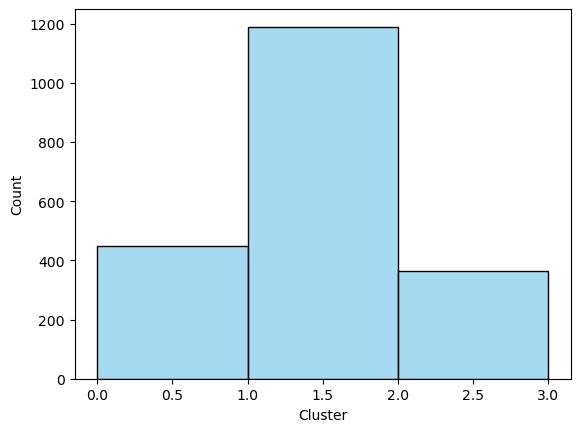

In [30]:
sns.histplot(data=df_normalized, x='Cluster', bins=range(4), kde=False, color='skyblue', edgecolor='black')
plt.show()

- The cluster number 2 turned out to be the largest. Clusters 1 and 3 are approximately equal in size.

****

**Q4**    
- 0 - "Безусловно, согласия, сплоченности"
- 1 - "Скорее согласия, сплоченности"
- 2 - "Безусловно, несогласия, разобщенности"
- 3 - "Скорее несогласия, разобщенности"
- 4 - "Затрудняюсь ответить"

**Q5**
- 0 - "Скорее к первым (к готовым объединяться)"
- 1 - "Безусловно, к первым (к готовым объединяться)"
- 2 - "Скорее ко вторым (к неготовым объединяться)"
- 3 - "Безусловно, ко вторым (к неготовым объединяться)"
- 4 - "Затрудняюсь ответить"

****

### Consider clusters in more detail

### Cluster 0

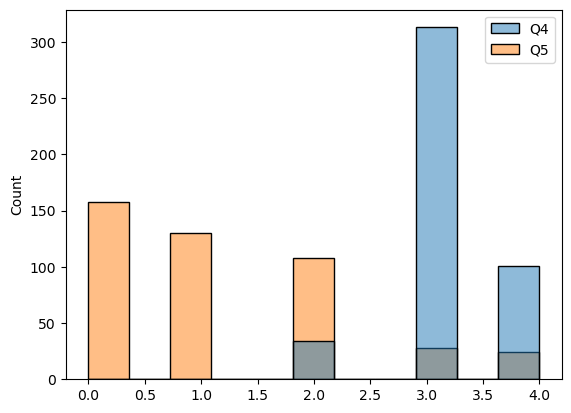

In [31]:
df = df_normalized.query('Cluster == 0')
ax = sns.histplot(data = df[['Q4', 'Q5']])

In [32]:
print(f"Number of people in cluster 0: {df.shape[0]}")

Number of people in cluster 0: 448


- In the cluster 0, the largest number of people have labels 3 and 4 under criterion Q4, indicating that they are more likely to experience disagreement, disunity, or difficulty in answering.
- The largest number of people have labels 0 and 1 under criterion Q5, indicating that they are more likely and many who are **unquestionably**

So, out of 448 people who are more likely and unquestionably ready to unite with others for joint actions, they are in an environment where there is more likely to be disagreement and disunity.

### Cluster 1

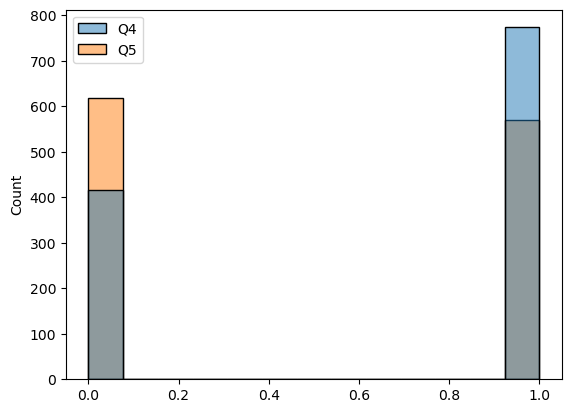

In [33]:
df = df_normalized.query('Cluster == 1')
ax = sns.histplot(data = df[['Q4', 'Q5']])

In [34]:
print(f"Number of people in cluster 1: {df.shape[0]}")

Number of people in cluster 1: 1190


- In the cluster 1, the largest number of people have labels 0 and 1 under criterion Q4, indicating that they are more likely and unquestionably in an environment of agreement and unity.
- The largest number of people have labels 0 and 1 under criterion Q5, indicating that they are more likely and many who are unquestionably ready to unite with others.

So, 1190 people are in an environment where there is more agreement, and they themselves are ready to unite with others for joint actions.

### Cluster 2

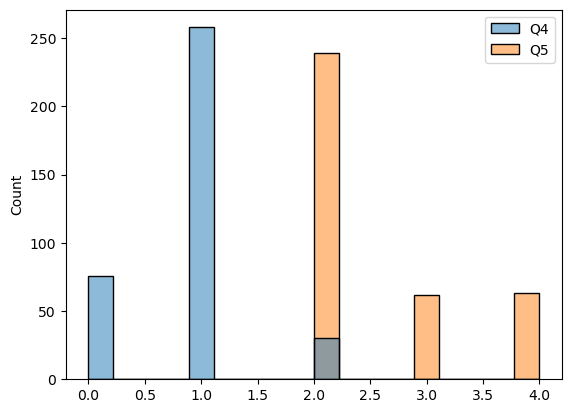

In [35]:
df = df_normalized.query('Cluster == 2')
ax = sns.histplot(data = df[['Q4', 'Q5']])

In [36]:
print(f"Number of people in cluster 2: {df.shape[0]}")

Number of people in cluster 2: 364


- In the cluster 2, the largest number of people have label 1 under criterion Q4, indicating that they are more likely in an environment of agreement and unity.
- The largest number of people have label 2 under criterion Q5, indicating that they are more likely not ready to unite.

So, 364 people are in an environment where there is more agreement and unity, but they are still not ready to unite with others for joint actions.

<div style="border:solid Chocolate 2px; padding: 40px">

## 2️⃣ Conclusion on clustering Q4 and Q5: <a class="tocSkip">

- Data has been divided into 3 clusters:
    - **Cluster #1: 448 people**
        - 448 people are more likely and definitely ready to unite with others for joint actions in an environment of more disagreement and disunity.
    - **Cluster #2: 1190 people**
        - 1190 people are in an environment of more agreement and are also ready to unite with others for joint actions.
    - **Cluster #3: 364 people**
        - 364 people are in an environment of more agreement and unity, but they are less willing to unite with others for joint actions.

## ‼️ Conclusion <a class="tocSkip">

Therefore, the majority - more than 50% - live in a cohesive society and are ready to unite with others. Around 25% are proactive individuals who do not live in a cohesive society but are willing to unite with others for further collaboration to change this. The remaining 25% are likely introverts and shy individuals who live in a cohesive society but lack initiative and may even fear collaborating with new people.


****

<div class="alert alert-warning">
    <h2> 3️⃣Let's check the most frequently occurring responses in the large test questions Q7 and Q8.<a class="tocSkip"> </h2>
    
</div>

### consider the question Q7: "О каких общественных, некоммерческих организациях и инициативах В ВАШЕМ ГОРОДЕ (СЕЛЕ, ПОСЁЛКЕ) Вы знаете или хотя бы слышали?"

In [37]:
# Let's look at the data 
df_q7 = data.iloc[1:, 14:41]
df_q7.head(5)

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,...,Q7_18,Q7_19,Q7_20,Q7_21,Q7_22,Q7_23,Q7_24,Q7_25,Q7_26,Q7_97
ID,,,,,,,,,,,,,,,,,,,,,
063a20a33e679b4,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06539b004760a54,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06e85272a3a11d4,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06470c0967c0d24,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06c807717b98184,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН


In [38]:
# check for missing values
df_q7.isna().sum(),

(Q7_1     0
 Q7_2     0
 Q7_3     0
 Q7_4     0
 Q7_5     0
 Q7_6     0
 Q7_7     0
 Q7_8     0
 Q7_9     0
 Q7_10    0
 Q7_11    0
 Q7_12    0
 Q7_13    0
 Q7_14    0
 Q7_15    0
 Q7_16    0
 Q7_17    0
 Q7_18    0
 Q7_19    0
 Q7_20    0
 Q7_21    0
 Q7_22    0
 Q7_23    0
 Q7_24    0
 Q7_25    0
 Q7_26    0
 Q7_97    0
 dtype: int64,)

- The data is complete, there are no missing values.

In [39]:
cols_q7 = df_q7.columns
counts_q7 = list()

for column in df_q7.columns:
    dff = df_q7.loc[df_q7[column] == 'ВЫБРАН', column]
    counts_q7.append(len(dff))

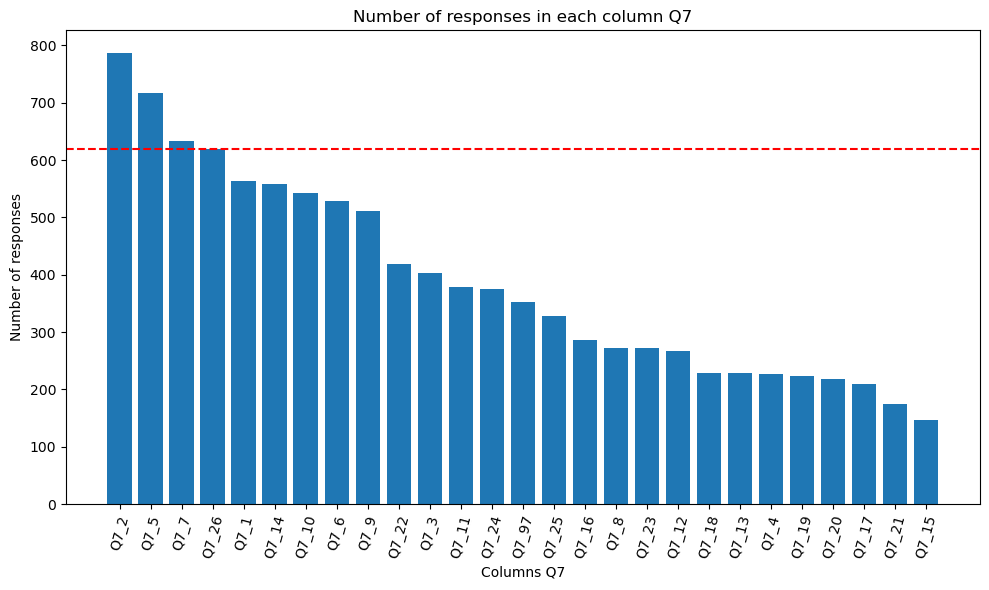

In [40]:
# Creating a DataFrame with sorted values and column names
sorted_counts_q7 = pd.DataFrame({'Column': cols_q7, 'Count': counts_q7}).sort_values(by='Count', ascending=False)

# Setting the 'Column' column as the index
sorted_counts_q7 = sorted_counts_q7.set_index('Column')

# Creating a plot
plt.figure(figsize=(10, 6))

# Plotting a bar chart
plt.bar(sorted_counts_q7.index, height=sorted_counts_q7['Count'])

# X-axis labels rotated by 75 degrees
plt.xticks(rotation=75)

# Adding a horizontal line for comparison
plt.axhline(y=620, color='red', linestyle='--', label='Comparison')

# Adding title and axis labels
plt.title('Number of responses in each column Q7')
plt.xlabel('Columns Q7')
plt.ylabel('Number of responses')

# Displaying the plot
plt.tight_layout()
plt.show()


In [41]:
sorted_counts_q7.head(3)

,Count
Column,
Q7_2,787
Q7_5,717
Q7_7,634


**Top-3 most frequently occurring responses in Q7 are:**

- Q7_2 (787 responses): "Garden and dacha associations"
- Q7_5 (717 responses): "Trade unions"
- Q7_7 (634 responses): "Disabled societies"
  
This means that in almost 40% of cases, people are aware of organizations such as _Garden and dacha associations_ and _Trade unions_. In 30%, they are aware of _Disabled societies_ and _Political parties._

### Also consider the question Q8: "Откуда Вам известны эти организации и инициативы?"

In [42]:
# Let's look at the data
df_q8 = data.iloc[1:, 44:51]
df_q8.head(5)

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7
ID,,,,,,,
063a20a33e679b4,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06539b004760a54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06e85272a3a11d4,ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06470c0967c0d24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06c807717b98184,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН


In [43]:
# check for missing values
df_q8.isna().sum()

Q8_1    353
Q8_2    353
Q8_3    353
Q8_4    353
Q8_5    353
Q8_6    353
Q8_7    353
dtype: int64

- Approximately 17.5% of values are missing, which is suspicious because all participants answered the previous question. Let's try to find out the reason.

In [44]:
columns_to_check = df_q8.columns

In [45]:
# Let's select the data in Q8 where there are missing values in each of the columns.
rows_with_all_missing_values = df_q8[df_q8[columns_to_check].isnull().all(axis=1)]

In [46]:
# Let's check the data from the previous question Q7 based on the indices from Q8
df_q7_subset = df_q7.loc[rows_with_all_missing_values.index]

In [47]:
df_q7_subset.head(5)

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,...,Q7_18,Q7_19,Q7_20,Q7_21,Q7_22,Q7_23,Q7_24,Q7_25,Q7_26,Q7_97
ID,,,,,,,,,,,,,,,,,,,,,
06539b004760a54,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06470c0967c0d24,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
066bf76d3dc27e4,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
0668f4925e24d94,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06195549e8aba24,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН


In [48]:
selected_count = df_q7_subset[df_q7_subset['Q7_97'] == "ВЫБРАН"].shape[0]
selected_count

353

- The number of missing rows in Q8 coincides with the number of rows in Q7 where "Ни о каких организациях не знаю и не слышал(-а)" was chosen as the answer.     
_This explains the anomaly found, so everything is fine._

In [49]:
# removing missing values
df_q8 = df_q8.dropna()

In [50]:
cols_q8 = df_q8.columns
counts_q8 = list()

# Function to count responses in each item
for column in df_q8.columns:
    dff = df_q8.loc[df_q8[column] == 'ВЫБРАН', column]
    counts_q8.append(len(dff))

In [51]:
# Creating a DataFrame with sorted values and column names
sorted_counts_q8 = pd.DataFrame({'Column': cols_q8, 'Count': counts_q8}).sort_values(by='Count', ascending = False)

# Setting the 'Column' column as the index
sorted_counts_q8 = sorted_counts_q8.set_index('Column')

In [52]:
sorted_counts_q8.head(3)

,Count
Column,
Q8_4,952
Q8_7,511
Q8_6,387


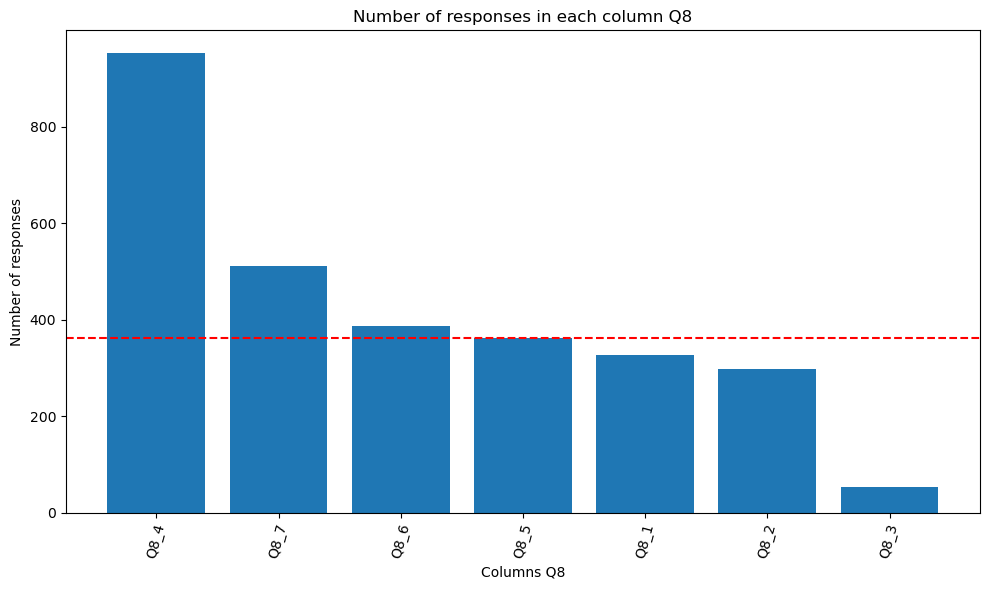

In [53]:
# Creating a plot
plt.figure(figsize=(10, 6))

# Plotting a bar chart
plt.bar(sorted_counts_q8.index, height=sorted_counts_q8['Count'])

# X-axis labels rotated by 75 degrees
plt.xticks(rotation=75)

# Adding a horizontal line for comparison
plt.axhline(y=361, color='red', linestyle='--', label='Comparison')

# Adding title and axis labels
plt.title('Number of responses in each column Q8')
plt.xlabel('Columns Q8')
plt.ylabel('Number of responses')

# Displaying the plot
plt.tight_layout()
plt.show()

In [54]:
# Create an empty list to store indexes of rows with multiple occurrences "ВЫБРАН"
rows_with_multiple_choices = []

# We go through each line
for index, row in df_q8.iterrows():
    # Count the number of occurrences of "ВЫБРАН" in a string 
    count_chosen = row.eq("ВЫБРАН").sum()
    # If the quantity is greater than one, add the row index to the list
    if count_chosen > 1:
        rows_with_multiple_choices.append(index)

# Display a list of row indices with multiple occurrences of  "ВЫБРАН"
print(f"Number of people who selected multiple answers: {len(rows_with_multiple_choices)}")


Number of people who selected multiple answers: 678


- In general, this does not affect our research in any way because We care about the distribution of signs by which people learn about organizations

**Top 3 most common answers in Q8 are:**
- Q8_4 (952 answers): “I heard from other people”
- Q8_7 (511 answers): “From materials on the Internet, social networks”
- Q8_6 (387 answers): "From outdoor advertising / banners on the street"

That is, in almost 50% of cases people learn about such organizations from other people. 25% from materials on the Internet, social networks and the rest most from outdoor advertising / banners on the street / newspapers / radio

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>3️⃣ Conclusion on major survey questions <a class="tocSkip"> </h2>

<ul>
    <li>Almost 40% of people are aware of organizations such as Garden and dacha associations and Trade unions. About 30% know about Disabled society and Political parties.</li>
    <li>Almost 50% of people learn about such organizations from other people. 25% from Internet materials, social networks and in the rest of the majority from External advertising/ banners on the street/ newspapers/ radio


<div class="alert alert-warning">
    <h2> 4️⃣ Analysis of the consistency of preferences in charitable activities ¶<a class="tocSkip"> </h2>
    
</div>

In [55]:
# data upload
df = pd.read_excel('/Users/vladimirkalinovskii/Desktop/trash/курсовая 1/883_ИМД-2.xlsx', index_col=0)
# convert the Respondent ID from the index to a column
df.reset_index(inplace= True , level = ['ID'])

In [56]:
df = df.iloc[1:, list(range(4, 7)) + list(range(53, 79))]
df = df.dropna()

In [57]:
columns = df.columns

In [58]:
# Select only the required columns
selected_columns = columns
df_selected = df[selected_columns]

# Let's calculate the Kendall coherence coefficients for the selected columns
correlations = {}
for col1 in selected_columns:
    for col2 in selected_columns:
        if col1 != col2:
            tau, _ = kendalltau(df_selected[col1], df_selected[col2])
            correlations[f'{col1} vs {col2}'] = tau

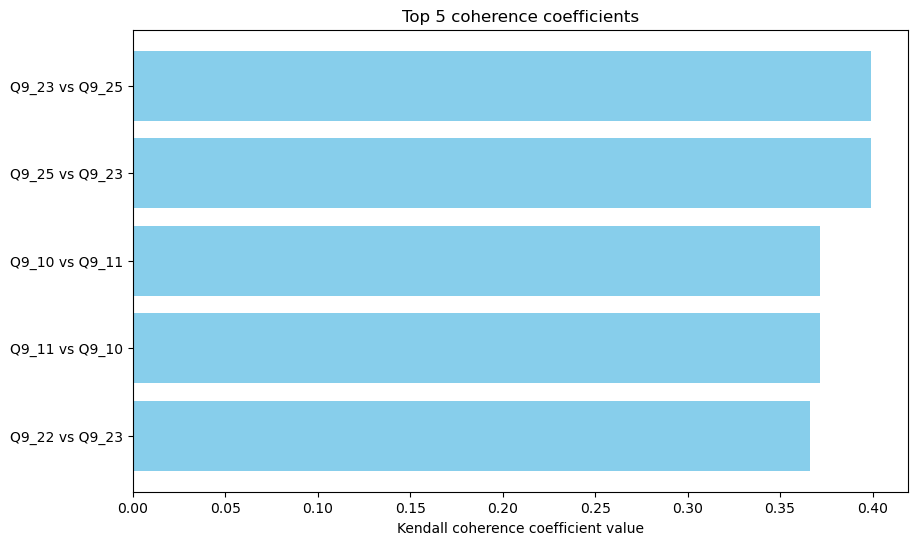

In [59]:
# Sort the odds in descending order
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# We will display the top 5 odds
top_5 = sorted_correlations[:5]

# Get the column names and their values
column_names = [pair[0] for pair in top_5]
values = [pair[1] for pair in top_5]

# create a graph
plt.figure(figsize=(10, 6))
plt.barh(column_names, values, color='skyblue')
plt.xlabel('Kendall coherence coefficient value')
plt.title('Top 5 coherence coefficients')
plt.gca().invert_yaxis()  # Let's flip the y-axis so that the highest coefficient is at the top
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>4️⃣ Conclusion on Preference Consistency</h2>

<p style="font-size:16px;">
The results of the analysis confirm a high degree of consistency in the respondents' preferences for supporting various types of charitable and community activities. A significant positive correlation was found between the support for cultural and environmental movements (Q9_23) and environmental organizations (Q9_25), as well as between charitable organizations (Q9_10) and charitable funds (Q9_11). These results can be used for effective planning of support attraction strategies and resource allocation.
</p>

</div>

<div class="alert alert-warning">
    <h2> 5️⃣ Machine learning to predict missing answers in question "D9" ¶<a class="tocSkip"> </h2>
    
</div>

### Found in the question “Какое место занимает религия в Вашей жизни?” 560 missing answers

People who answered the question “Считаете ли Вы себя верующим человеком?" - "Верующим человеком себя не считаю” missed the question that interests us, “Какое место занимает религия в Вашей жизни?”
**Using machine learning models, we’ll try to predict what they might answer, if possible**

In [60]:
data['D9'].isnull().sum()

560

- 560 people did not answer this question

In [61]:
# Let's check how many people had difficulty answering this question
data.query('D9 == "Затрудняюсь ответить"')['D9'].count()

86

- this is only about 4% of all respondents

In [62]:
data.shape

(2003, 500)

In [63]:
# we will use data from category D questions
df = data.iloc[1:, 484:500]
df.head(5)

,D1,D2,D3,D4,D5,D5_DR,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
ID,,,,,,,,,,,,,,,,
063a20a33e679b4,"На одежду, обувь денег хватает, но крупную быт...",Менее половины,Нахожусь на пенсии и не работаю,NaN,NaN,NaN,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Среднее
06539b004760a54,"На одежду, обувь денег хватает, но крупную быт...",/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить/отказ о...,Нахожусь на пенсии и не работаю,NaN,NaN,NaN,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Плохое
06e85272a3a11d4,На квартиру или дом денег хватает,Примерно две трети,Работаю,Самозанятый(-ая),NaN,NaN,"Сфера услуг, сервиса, бытового обслуживания",NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Мусульманин,NaN,Очень важное,"Стараюсь выполнять религиозные предписания, ре...",NaN,Среднее
06470c0967c0d24,Денег не хватает даже на питание,Почти все,Работаю,Работаю по найму,Рабочий,NaN,Промышленное производство (в т.ч. добывающие о...,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Православный,NaN,Затрудняюсь ответить,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее
06c807717b98184,"На бытовую технику денег хватает, но автомобил...",Менее половины,Учусь,NaN,NaN,NaN,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Затрудняюсь ответить/отказ от ответа,NaN,Совершенно не важное,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее


In [64]:
# replace the values '/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить' with -->
# 'Затрудняюсь ответить'
df = df.replace(['/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить'],\
                                    'Затрудняюсь ответить')

In [65]:
imp = SimpleImputer(strategy='constant', fill_value='unknown')
cl = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D10', 'D11']
df[cl] = imp.fit_transform(df[cl])
df[cl] = pd.DataFrame(df[cl], columns = cl)

### Data preparation

- **target feature – “D9”**
- remove the signs 'D5_DR', 'D6_DR', 'D8_DR', 'D10_DR' because These are additional answers and they can complicate the process, but removing them will not affect the predictions because there are very few additional answers

In [66]:
# select a test sample, where the target feature will consist of missing values
X_test_final =  df[df['D9'].isnull()].drop(['D9', 'D5_DR', 'D6_DR', 'D7_DR', 'D8_DR', 'D10_DR'], axis=1)

In [67]:
# Creating a DataFrame X with no rows where 'D9' is not equal to np.nan
X = df[df['D9'].notnull()].drop(['D9', 'D5_DR', 'D6_DR', 'D7_DR', 'D8_DR', 'D10_DR'], axis=1)

# Creating Series y with rows where 'D9' is equal to np.nan
y = df[df['D9'].notnull()]['D9']

In [68]:
# Let's take the test sample at 20%
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE,
    test_size = 0.2)

In [69]:
ohe_columns = ['D6', 'D7', 'D8']
ord_columns = ['D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11']

In [70]:
# add encoded ones
ord_lst = list()

for i in ord_columns:
    a = list(X[i].unique())
    ord_lst.append(a)

In [71]:
# encoding part of the data using OneHotEncoder
ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [72]:
# encoding part of the data using OrdinalEncoder
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
        ),
        (
            'ord',  
            OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
        )
    ]
)

In [73]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns)
    ], 
    remainder='passthrough'
)

In [74]:
# final pipeline: data preparation and model
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [75]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [76]:
pipe_final.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['D6', 'D7', 'D8']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant'))]),
                                                  ['D1', 'D2', 'D3', 'D4', 'D5',
                                                   'D10', 'D11'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

### Let's predict missing values ​​by first encoding the training data into numbers

In [77]:
param_grid = [
    # dictionary for the KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'models__weights': ['uniform', 'distance'],
        'models__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    # dictionary for the DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4]
    },
    # dictionary for the SVC()
    {
        'models': [SVC(kernel='linear', random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'models__gamma': ['scale', 'auto']
    },
    # dictionary for the LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'models__solver': ['liblinear', 'saga'],
        'models__penalty': ['l1', 'l2']
    }
]

In [78]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

/Users/vladimirkalinovskii/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vladimirkalinovskii/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vladimirkalinovskii/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vladimirkalinovskii/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/v

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['D6',
                                                                          'D7',
                                                                          'D8']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_before_ord',
                                                                                          SimpleImputer(fill_value=-1,
                                                                                                        strategy='constant')),
                                                                                         ('ord',
                                                                                          Ord...
                          'models__max_depth': range(2, 11),
                          'models__min_samples_leaf': [1, 2, 4],
                          'models__min_samples_split': [2, 5, 10]},
                         {'models': [SVC(kernel='linear', random_state=42)],
                          'models__C': [0.1, 1, 10, 100],
                          'models__gamma': ['scale', 'auto']},
                         {'models': [LogisticRegression(random_state=42)],
                          'models__C': [0.1, 1, 10, 100],
                          'models__penalty': ['l1', 'l2'],
                          'models__solver': ['liblinear', 'saga']}],
             scoring='accuracy')

In [79]:
model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [80]:
print('The best model and its parameters:\n\n', model)
print ('Metric of the best model on the training set:', best_score)

The best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['D6', 'D7', 'D8']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
         

- the metric of the best model on cross-validation is not of the best quality - 0.5585. It is worth considering the specifics of the data, they are text, so encoding them into numbers may not be the best option, but it has a place.

In [81]:
# create lists of the best models
# and their accuracy metric values ​​for cross-validation
mdl = list()
acc_score = list()

In [82]:
acc_score.append(best_score)

In [83]:
# Getting the name of the best model
best_model_name = type(model.named_steps['models']).__name__
mdl.append(best_model_name)

In [84]:
# predicted values
preds = model.predict(X_test_final)

In [85]:
# Create a Series object from predicted values
preds_series = pd.Series(preds)

# Counting the number of unique values
value_counts = preds_series.value_counts()
value_counts

Довольно важное         207
Не очень важное         179
Затрудняюсь ответить     77
Совершенно не важное     67
Очень важное             30
Name: count, dtype: int64

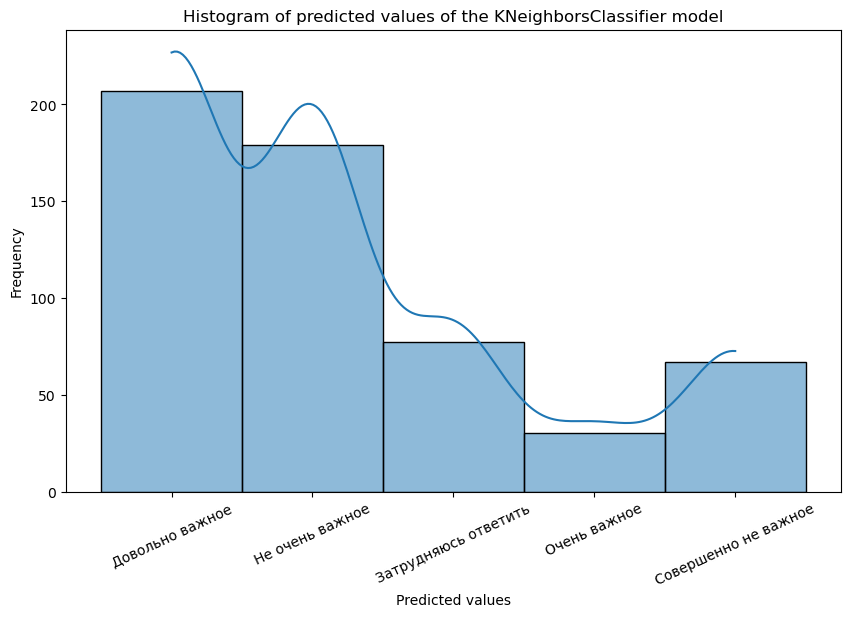

In [86]:
# Building a histogram
plt.figure(figsize=(10, 6))
sns.histplot(preds, bins=20, kde=True)
plt.xlabel('Predicted values')
plt.ylabel('Frequency')
plt.title('Histogram of predicted values ​​of the KNeighborsClassifier model')
plt.xticks(rotation = 25)
plt.show()

- For 37% of people who did not answer this question, religion is quite important. For 31% it is not very important and for 12% it is not at all important or they found it difficult to answer.

****

### We use a new method of encoding text data into numeric attributes:        
**"Term Frequency-Inverse Document Frequency" (TF-IDF)**

**I was choosing between two tools for converting text data into numeric attributes:**
- CountVectorizer: often used when it is important to simply take into account the frequency of occurrence of words.
- TfidfVectorizer: often preferred when you need to consider not only the frequency, but also the importance of a word for a particular document in the context of the entire collection.

**TfidfVectorizer** will be preferable in our case, taking into account the specifics of the data

In [87]:
df['combined'] = df['D1'] + ' ' + df['D2'] + ' ' + df['D3'] + ' ' + df['D4'] + ' ' + df['D5'] \
                + ' ' + df['D6'] + ' ' + df['D7'] + ' ' + df['D8'] + ' ' + df['D10'] + ' ' + df['D11']

In [88]:
X_train = df[df['D9'].notnull()]['combined']
y_train = df[df['D9'].notnull()]['D9']
X_test = df[df['D9'].isnull()]['combined']

In [89]:
# Converting text data to features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [90]:
# Balancing classes using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initializing and training a random forest model
rf_model = RandomForestClassifier(random_state=42)

# Defining Parameters for RandomizedSearchCV 
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.2, 0.5, 0.8, None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Creating a RandomizedSearchCV Object
random_search = RandomizedSearchCV(rf_model,
                                   param_grid,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   scoring='accuracy',
                                   random_state=42)

# Finding the best parameters on training data
random_search.fit(X_train_resampled, y_train_resampled)
#random_search.fit(X_train, y_train)


# Best parameters and model evaluation
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best parameters:", best_params)
print("Best accuracy score on cross-validation:", best_score)

# Using the best parameters for the model
best_rf_model_2 = random_search.best_estimator_

# Prediction on a test set with the best model
predictions = best_rf_model_2.predict(X_test)

Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': None, 'bootstrap': False}
Best accuracy score on cross-validation: 0.7709164978201001


- Here the accuracy metric is already more acceptable - 0.7709. This means that this method of data encoding is much more efficient; we also used class balancing using SMOTE

In [91]:
mdl.append("RandomForestClassifier")
acc_score.append(best_score)

In [92]:
preds = pd.Series(predictions)
preds.value_counts()

Не очень важное         262
Довольно важное         165
Совершенно не важное     93
Затрудняюсь ответить     35
Очень важное              5
Name: count, dtype: int64

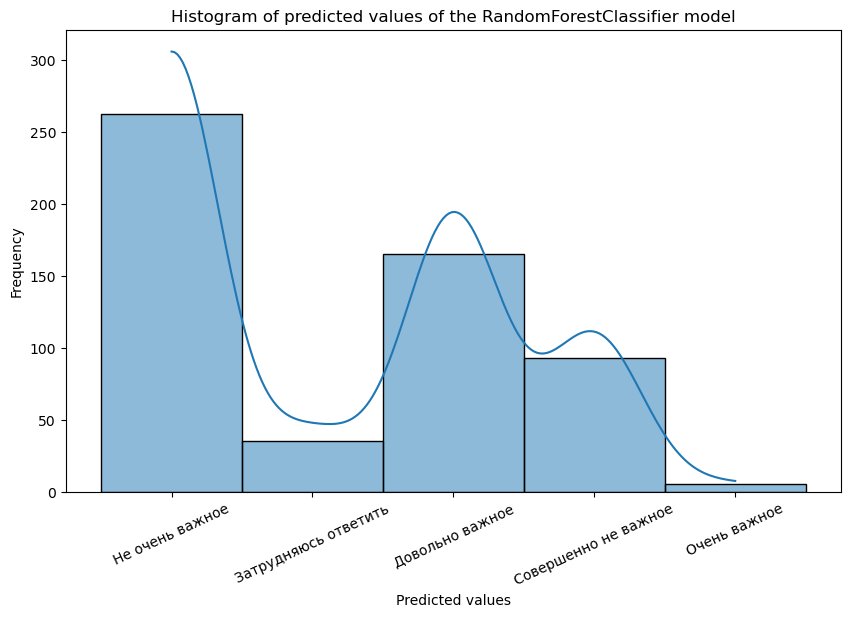

In [93]:
# Building a histogram
plt.figure(figsize=(10, 6))
sns.histplot(preds, bins=20, kde=True)
plt.xlabel('Predicted values')
plt.ylabel('Frequency')
plt.title('Histogram of predicted values ​​of the RandomForestClassifier model')
plt.xticks(rotation = 25)
plt.show()

**For 46% of people who did not answer this question, religion is not very important. For 30% it is not very important and for 12% it is quite important and for 15% it is not at all important**

****

### Let's use gradient boosting to predict missing answers

In [94]:
# Initializing and training the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=500,  # Number of iterations
    learning_rate=0.1,  # Learning rate
    depth=6,  # Tree depth
    random_seed=42,  # Set a random value for reproducibility of results
    verbose=100  # Output progress every 100 iterations
)

score = cross_val_score(catboost_model, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')

# Training a model on training data
catboost_model.fit(X_train_resampled, y_train_resampled)

# Prediction on a test sample
predictions = catboost_model.predict(X_test)

0:	learn: 1.5336855	total: 96.7ms	remaining: 48.3s
100:	learn: 0.6066578	total: 2.12s	remaining: 8.37s
200:	learn: 0.4335597	total: 4.1s	remaining: 6.1s
300:	learn: 0.3498529	total: 6.1s	remaining: 4.03s
400:	learn: 0.2936079	total: 8.06s	remaining: 1.99s
499:	learn: 0.2534791	total: 9.99s	remaining: 0us
0:	learn: 1.5439412	total: 17.9ms	remaining: 8.92s
100:	learn: 0.7020361	total: 1.47s	remaining: 5.81s
200:	learn: 0.5108787	total: 2.89s	remaining: 4.3s
300:	learn: 0.4124303	total: 4.32s	remaining: 2.86s
400:	learn: 0.3493205	total: 5.81s	remaining: 1.44s
499:	learn: 0.3003625	total: 7.47s	remaining: 0us
0:	learn: 1.5452426	total: 17.5ms	remaining: 8.75s
100:	learn: 0.7091433	total: 1.68s	remaining: 6.64s
200:	learn: 0.5446951	total: 3.27s	remaining: 4.86s
300:	learn: 0.4584677	total: 4.79s	remaining: 3.16s
400:	learn: 0.3930973	total: 6.37s	remaining: 1.57s
499:	learn: 0.3462970	total: 7.88s	remaining: 0us
0:	learn: 1.5353667	total: 21.7ms	remaining: 10.8s
100:	learn: 0.6746210	tota

In [95]:
score = max(score)
print(score)

0.8283132530120482


- Best accuracy metric on cross-validation: 0.8283

In [96]:
mdl.append("CatBoostClassifier")
acc_score.append(score)

In [97]:
# Convert 'preds' to a one-dimensional array
preds = predictions.flatten()

# Create a Series object
preds = pd.Series(preds, dtype='string')

In [98]:
preds.value_counts()

Довольно важное         222
Совершенно не важное    144
Не очень важное         107
Затрудняюсь ответить     60
Очень важное             27
Name: count, dtype: Int64

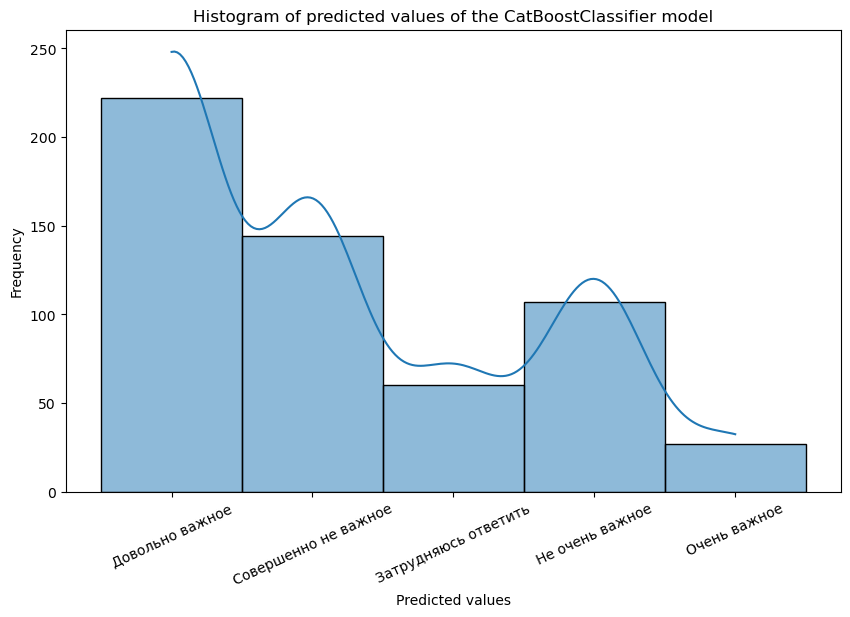

In [99]:
# Building a histogram
plt.figure(figsize=(10, 6))
sns.histplot(preds, bins=20, kde=True)
plt.xlabel('Predicted values')
plt.ylabel('Frequency')
plt.title('Histogram of predicted values ​​of the CatBoostClassifier model')
plt.xticks(rotation = 25)
plt.show()

**For 40% of people who did not answer this question, religion is quite important. For 25% it is absolutely not at all important and for 19% it is not very important and for 15% it is not at all important**

### Let's create a table with models and the values ​​of their metrics¶

In [100]:
table = pd.DataFrame({
    'model': mdl,
    'accuracy': acc_score
})

table

,model,accuracy
0,KNeighborsClassifier,0.558558
1,RandomForestClassifier,0.770916
2,CatBoostClassifier,0.828313


- The best model is **CatBoostClassifier**. It is significantly better in quality than previous models, which means we will be guided by its predictions.

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>5️⃣ Conclusion on Predictions of Missing Responses in Question "D9" <a class="tocSkip"></h2>

<p style="font-size:16px;">
1️⃣ For predictions on encoded data using OneHotEncoder and OrdinalEncoder, several models and their hyperparameters were tested through GridSearchCV. The best model was KNeighborsClassifier, with an accuracy of 0.558558.
</p>

<p style="font-size:16px;">
2️⃣ For predictions on encoded data using TfidfVectorizer, the RandomForestClassifier model was used and hyperparameters were tuned through RandomizedSearchCV. The best accuracy metric on cross-validation was 0.770916.
</p>

<p style="font-size:16px;">
3️⃣ Another approach for predictions on encoded data using TfidfVectorizer involved the gradient boosting model - CatBoostClassifier. Fixed hyperparameters were used for this model. The best accuracy metric on cross-validation was 0.828313.
</p>

<h2>‼️ Conclusion <a class="tocSkip"></h2>

<p style="font-size:16px;">
The best model is CatBoostClassifier. It significantly outperforms the previous models in terms of quality, and therefore we will rely on its predictions.
</p>

<p style="font-size:16px;">
For 40% of people who did not answer this question, religion has a fairly important significance. For 25%, it is completely unimportant, for 19% it is not very important, and for 15% it is of no importance at all.
</p>

</div>

****

****

<h1>☝ General Conclusion on the Project</h1> 

<div style="border:solid Chocolate 2px; padding: 40px">

<h2 style="color:#ff6347;">1️⃣ Demographic Analysis:</h2> 
    
**The conducted analysis of demographic data revealed the following important points:**

- The most numerous groups of respondents are from the following cities: Moscow, Saint Petersburg, Republic of Dagestan, Stavropol Krai, and Rostov Oblast. This indicates a wide geographic coverage and diversity of the represented regions.
- Age analysis showed that respondents from Stavropol Krai are the oldest, with a median age of 50 years for women and 47 years for men. This may indicate more stable and mature age groups in this region.
- More women participated in the survey than men. This may be due to their greater willingness to participate in such studies, as well as higher social activity.
- It is noted that 38.4% of respondents have secondary vocational education, which is the most common level of education among respondents. At the same time, only 2 people in the sample completed postgraduate studies.

---

<h3 style="color:#008080;">🔍 Conclusions</h3>
The demographic analysis allowed us to better understand the characteristics of the surveyed audience. We found that participants from various regions of Russia took part in the study, indicating its wide coverage. It also turned out that the majority of respondents have secondary vocational education, but only a few completed postgraduate studies.

The oldest respondents are from Stavropol Krai, which may indicate the specifics of this region. Moreover, the larger number of women in the survey may indicate higher activity in such studies.

These results allow us to conclude that the study provided insight into the diversity and geographic distribution of respondents, their education level, and age characteristics. This information can be useful for further analysis and development of recommendations.

---

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h2 style="color:#ff6347;">2️⃣ Clustering of Respondents</h2>
The conducted clustering allowed us to divide respondents into three main clusters with different characteristics and readiness for joint actions:

<h4 style="color:#4682b4;">🕐 Cluster #1: Willingness to Unite</h4>
This cluster includes 448 people who are likely and unconditionally ready to unite with others for joint actions. However, their environment is characterized by a large number of disagreements and disunity. This may indicate that although they are ready to cooperate, external factors create certain obstacles.

<h4 style="color:#4682b4;">🕑 Cluster #2: Prevalence of Agreement</h4>
This cluster includes 1190 people, among whom agreement prevails in their environment. They are also ready to unite with others for joint actions. This cluster may represent a more harmonious and cohesive community ready for cooperation.

<h4 style="color:#4682b4;">🕒 Cluster #3: Agreement and Cohesion</h4>
Cluster #3 includes 364 people, among whom agreement and cohesion prevail. However, they are rather not ready to unite with others for joint actions. This cluster may be interesting because people in it appear more cohesive but do not show high readiness for active cooperation.

<h3 style="color:#008080;">🔍 Conclusions</h3>
Based on the cluster analysis, the following conclusions can be made:

- The majority of respondents, more than 50%, live in a cohesive society and are ready to unite with others for joint actions. This indicates a high level of social activity and openness to cooperation.
- About 25% of respondents can be characterized as proactive people who do not live in a cohesive society but are ready to unite with others for further cooperation.
- The remaining 25% are most likely introverted and shy individuals who live in a cohesive society but do not show high initiative in cooperating with others.

Thus, cluster analysis helped us better understand the social structure and readiness for cooperation of the surveyed audience. These conclusions can be useful in developing strategies for social interaction and initiatives aimed at community development and improving the quality of life of its members.

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h2 style="color:#ff6347;">3️⃣ Awareness of Organizations</h2>
From the analysis of respondents' awareness of organizations, the following key points can be highlighted:

<h4 style="color:#4682b4;">🧠 Awareness of Various Organizations:</h4>

- Garden and Country Associations and Trade Unions: Almost 40% of respondents are aware of the existence of such organizations. This may indicate a significant level of awareness of organizations that contribute to ensuring personal interests and social rights.
- Disability Associations and Political Parties: Approximately 30% of respondents are aware of these organizations. These data may indicate some awareness of social and political structures influencing public life.
- Sources of Information: Almost 50% of respondents learn about various organizations from other people. This indicates the significant role of word-of-mouth transmission and social networks in disseminating knowledge.
- Internet and Other Resources: In 25% of cases, respondents receive information about organizations from online materials, social networks, as well as from outdoor advertising, street banners, newspapers, and radio. This reflects the importance of modern information technologies and media resources in spreading information.

<h3 style="color:#008080;">🔍 Conclusions</h3>
Thus, the analysis of awareness of organizations allows us to draw the following conclusions:

- High Level of Awareness: Nearly half of the respondents are aware of various organizations, indicating a wide range of interests and engagement in social life.
- Role of Interpersonal Connections: About half of the respondents obtain information about organizations from other people. This underscores the importance of communication and knowledge exchange in forming perceptions of social structures.
- Importance of Information Technologies: The Internet and other media resources play a significant role in disseminating information about organizations, emphasizing the need to focus on digital communication channels.

Therefore, the presence of awareness of organizations among respondents indicates an active level of civic engagement and interest in public and social issues. These data may be important in shaping the information policies of organizations and government institutions, as well as in developing education and social support programs.

---

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h2 style="color:#ff6347;">4️⃣ Analysis of Preference Consistency in Charitable Activities</h2>

<h4 style="color:#4682b4;">📊 Consistency of Respondent Preferences:</h4>
The results of the analysis show a high degree of consistency in respondents' preferences for supporting various types of charitable and public activities. The greatest consistency was found between variables Q9_23 (Cultural, Local History, Conservation Movements) and Q9_25 (Environmental Organizations), as well as between variables Q9_25 and Q9_23. These results confirm the close relationship between support for cultural, conservation movements, and environmental organizations in respondents' preferences.

Additionally, consistency in preferences was found between variables Q9_10 (Charitable Organizations) and Q9_11 (Charitable Foundations), as well as between variables Q9_22 (Sports, Tourist, Hunting, Motorist Associations/Clubs) and Q9_23. These results indicate certain common trends in respondents' preferences for supporting various areas of charitable and public activities.

<h3 style="color:#008080;">🔍 Conclusions:</h3>
Based on this, organizations and initiatives related to cultural, conservation movements, and environmental activities can expect significant support from respondents. Attention should also be paid to the relationship between charitable organizations and foundations, as well as the connection between sports and public associations and cultural and conservation initiatives. These results can be useful in planning strategies for attracting support and distributing resources in the field of charity and public activities.

---

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h2 style="color:#ff6347;">5️⃣ Analysis of Predicting Missing Responses on the Role of Religion in Life</h2>
After conducting machine learning to predict missing responses to the question about the role of religion in respondents' lives, the following results were obtained:

<h4 style="color:#4682b4;">🔮 Predictions Using Machine Learning:</h4>

- **KNeighborsClassifier Model:** Using OneHotEncoder and OrdinalEncoder for predictions on encoded data, we achieved an accuracy of 0.558558 after hyperparameter tuning with GridSearchCV.
- **RandomForestClassifier Model:** Using TfidfVectorizer for predictions on encoded data, the best accuracy metric on cross-validation was 0.770916 after hyperparameter tuning with RandomizedSearchCV.
- **CatBoostClassifier Model:** For predictions on encoded data using TfidfVectorizer, the gradient boosting model achieved the best accuracy metric on cross-validation at 0.828313.

<h3 style="color:#008080;">🔍 Conclusions:</h3>
After analyzing the machine learning results for predicting missing responses on the role of religion in respondents' lives, the following conclusions can be made:

- **Best Model - CatBoostClassifier:** It can be confidently stated that the CatBoostClassifier model, demonstrating an accuracy metric of 0.828313, is the most accurate and effective for predicting the role of religion in the lives of respondents. By using this model, we can obtain the most reliable results.
- **Significance of Religion in Respondents' Lives:** For 40% of people who did not answer this question, religion plays a fairly important role. However, for 25% of respondents, it is completely unimportant, for 19% it is not very important, and for 15% it does not play any role at all.

Thus, the machine learning results allow us to better understand the importance of religious beliefs in the lives of our audience and make more informed decisions in data analysis and strategy development.

---

<div style="background-color:#f7f7f7; padding:20px; border: 2px solid #008080; border-radius: 5px;">
    <center>
        <h1 style="color:#008080;">🦄 Final Conclusion</h1>
    </center>
    <hr style="border-top: 2px solid #008080;">
    <p style="font-size:16px;">
        In the course of data analysis, key characteristics and preferences of the surveyed audience were identified. Demographic analysis revealed a wide geographic coverage of respondents, as well as the predominance of certain age and educational groups. Cluster analysis identified various groups with different levels of readiness for joint actions, which can be useful in developing strategies for engaging with the audience.
    </p>
    <p style="font-size:16px;">
        Additionally, the analysis of awareness of organizations and preferences in charitable activities revealed trends and preferences of respondents in this area. Finally, the results of machine learning to predict missing responses on the role of religion in life allowed a better understanding of the importance of this aspect in the lives of the surveyed audience.
    </p>
    <p style="font-size:16px;">
        The conducted research holds significant value, providing a wealth of data about the respondents. Demographic analysis provided an extensive understanding of the geographic and educational diversity of the study participants, highlighting its wide coverage. Cluster analysis revealed various social personality types, offering a basis for a tailored approach in planning engagement with them. Awareness of organizations highlighted the importance of interpersonal connections and digital platforms in disseminating information. Moreover, the machine learning model effectively predicted the role of religion in the respondents' lives.
    </p>
    <p style="font-size:16px;">
        The overall conclusion emphasizes the importance of the conducted research for developing targeted social interaction and educational programs that consider the diversity and specific needs of the audience. The obtained results can serve as a foundation for developing effective strategies aimed at improving the quality of life and social activity in society.
    </p>
</div>